In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Правильные имена переменных
orders = pd.read_csv('I:/PET/ANALITICS/Brazilian_Ecommerce_Analysis/olist_orders_dataset.csv')
customers = pd.read_csv('I:/PET/ANALITICS/Brazilian_Ecommerce_Analysis/olist_customers_dataset.csv')
products = pd.read_csv('I:/PET/ANALITICS/Brazilian_Ecommerce_Analysis/olist_products_dataset.csv')


In [395]:
print(customers.shape)
customers.info()

(99441, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [396]:
print(products.shape)
products.info()

(32951, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [397]:
# Считаю количество пропущенных значений в каждом столбце фрейма данных 
print(orders.isnull().sum())
print(customers.isnull().sum())
print(products.isnull().sum())


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [398]:
# Функция для подсчета пропусков в данных
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Пропущено значений', 1 : '% пропущенных значений'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% пропущенных значений', ascending=False)
    
    print ("Ваши данные содержат " + str(mis_val_table_ren_columns.shape[0]) + " колонок с пропущенными значениями.")

    return mis_val_table_ren_columns

missing_values_table(orders)
missing_values_table(customers)
missing_values_table(products)

Ваши данные содержат 3 колонок с пропущенными значениями.
Ваши данные содержат 0 колонок с пропущенными значениями.
Ваши данные содержат 8 колонок с пропущенными значениями.


,Пропущено значений,% пропущенных значений
product_category_name,610,1.851234
product_name_lenght,610,1.851234
product_description_lenght,610,1.851234
product_photos_qty,610,1.851234
product_weight_g,2,0.006070
product_length_cm,2,0.006070
product_height_cm,2,0.006070
product_width_cm,2,0.006070


In [399]:

def fullNulls(df):
    for column in df.columns:
        if df[column].dtype == object:
            df[column] = df[column].fillna("unknown")
        elif np.issubdtype(df[column].dtype, np.number):
            df[column] = df[column].fillna(df[column].median())

# Заполняем все пустые значения либо unknown (для текстовых полей)
# Либо медианным значением для числовых

fullNulls(products)
fullNulls(orders)

missing_values_table(orders)
missing_values_table(customers)
missing_values_table(products)

Ваши данные содержат 0 колонок с пропущенными значениями.
Ваши данные содержат 0 колонок с пропущенными значениями.
Ваши данные содержат 0 колонок с пропущенными значениями.


,Пропущено значений,% пропущенных значений


In [400]:
# Создаем сводную таблицу по ключу customer_id, она объединяет orders и customers

orders_customers_merged = orders.merge(customers, on="customer_id", how="inner")
orders_customers_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [401]:
order_items = pd.read_csv('I:/PET/ANALITICS/Brazilian_Ecommerce_Analysis/olist_order_items_dataset.csv')
missing_values_table(order_items)
full_data = orders_customers_merged.merge(order_items, on = "order_id", how="inner")

Ваши данные содержат 0 колонок с пропущенными значениями.


In [402]:
# Создаем таблицу со всеми заказами, общей стоимостью, стоимостью доставки, количеством товара

def calcDatas(df):
    grouped = df.groupby('order_id')
    total_price = grouped['price'].sum()
    total_freight = grouped['freight_value'].sum()
    total_count = grouped['order_item_id'].count()

    summary = pd.DataFrame({
        'total_price': total_price,
        'total_freight': total_freight,
        'items_count': total_count
    })

    print(summary.head())

full_data_copy = calcDatas(full_data)

                                  total_price  total_freight  items_count
order_id                                                                 
00010242fe8c5a6d1ba2dd792cb16214        58.90          13.29            1
00018f77f2f0320c557190d7a144bdd3       239.90          19.93            1
000229ec398224ef6ca0657da4fc703e       199.00          17.87            1
00024acbcdf0a6daa1e931b038114c75        12.99          12.79            1
00042b26cf59d7ce69dfabb4e55b4fd9       199.90          18.14            1


In [403]:
# Получаем таблицу с количеством дней от момента заказа до доставки клиенту
def calcDeliveryDatas(df):

    df['order_purchase_timestamp'] = df['order_purchase_timestamp'].replace('unknown', np.nan)
    df['order_delivered_customer_date'] = df['order_delivered_customer_date'].replace('unknown', np.nan)
    
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
    df['order_delivered_customer_date']= pd.to_datetime(df['order_delivered_customer_date'])
    df['delivery_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

    return df

full_data_with_days_delivery = calcDeliveryDatas(full_data)
full_data_with_products = full_data.merge(products, on="product_id", how="left")

In [404]:
# Получаем сводную таблицу с главными чистыми данными

columns_to_keep = [
    'order_id',
    'customer_unique_id',
    'customer_city',
    'customer_state',
    'order_status',
    'order_purchase_timestamp',
    'order_delivered_customer_date',
    'delivery_time_days',
    'total_price',
    'total_freight',
    'items_count',
    'product_category_name'
]
summary = full_data_with_products.groupby('order_id').agg({
    'price': 'sum',
    'freight_value': 'sum',
    'order_item_id': 'count'
}).rename(columns={
    'price': 'total_price',
    'freight_value': 'total_freight',
    'order_item_id': 'items_count'
}).reset_index()

full_data_with_products = full_data_with_products.merge(summary, on='order_id', how='left')
full_data_final = full_data_with_products[columns_to_keep]



In [405]:
# Подсчет статистик
data = full_data_final

# Средние
mean_total_price = data['total_price'].mean()
mean_item_count = data['items_count'].mean()
mean_total_freight = data['total_freight'].mean()
mean_delivery_days = data['delivery_time_days'].mean()

# Медианы
median_total_price = data['total_price'].median()
median_item_count = data['items_count'].median()
median_total_freight = data['total_freight'].median()
median_delivery_days = data['delivery_time_days'].median()

# Моды
mode_total_price = data['total_price'].mode()
mode_item_count = data['items_count'].mode()
mode_total_freight = data['total_freight'].mode()
mode_delivery_days = data['delivery_time_days'].mode()

# Минимумы и максиумы и размах 
min_total_price = data['total_price'].min()
min_item_count = data['items_count'].min()
min_total_freight = data['total_freight'].min()
min_delivery_days = data['delivery_time_days'].min()

max_total_price = data['total_price'].max()
max_item_count = data['items_count'].max()
max_total_freight = data['total_freight'].max()
max_delivery_days = data['delivery_time_days'].max()

scale_total_price = data['total_price'].max() - data['total_price'].min()
scale_item_count = data['items_count'].max() - data['items_count'].min()
scale_total_freight = data['total_freight'].max() - data['total_freight'].min() 
scale_delivery_days = data['delivery_time_days'].max() - data['delivery_time_days'].min()

# Дисперсии
var_total_price = data['total_price'].var()
var_item_count = data['items_count'].var()
var_total_freight = data['total_freight'].var()
var_delivery_days = data['delivery_time_days'].var()

# Среднеквадратичное отклонение
std_total_price = data['total_price'].std()
std_item_count = data['items_count'].std()
std_total_freight = data['total_freight'].std()
std_delivery_days = data['delivery_time_days'].std()


In [406]:
print("Средние значения:")
print(f"- Цена: {mean_total_price}")
print(f"- Количество товаров: {mean_item_count}")
print(f"- Доставка: {mean_total_freight}")
print(f"- Дни доставки: {mean_delivery_days}\n")

print("Медианы:")
print(f"- Цена: {median_total_price}")
print(f"- Количество товаров: {median_item_count}")
print(f"- Доставка: {median_total_freight}")
print(f"- Дни доставки: {median_delivery_days}\n")

print("Моды:")
print(f"- Цена: {mode_total_price.tolist()}")
print(f"- Количество товаров: {mode_item_count.tolist()}")
print(f"- Доставка: {mode_total_freight.tolist()}")
print(f"- Дни доставки: {mode_delivery_days.tolist()}\n")

print("Минимумы:")
print(f"- Цена: {min_total_price}")
print(f"- Количество товаров: {min_item_count}")
print(f"- Доставка: {min_total_freight}")
print(f"- Дни доставки: {min_delivery_days}\n")

print("Максимумы:")
print(f"- Цена: {max_total_price}")
print(f"- Количество товаров: {max_item_count}")
print(f"- Доставка: {max_total_freight}")
print(f"- Дни доставки: {max_delivery_days}\n")

print("Размах:")
print(f"- Цена: {scale_total_price}")
print(f"- Количество товаров: {scale_item_count}")
print(f"- Доставка: {scale_total_freight}")
print(f"- Дни доставки: {scale_delivery_days}\n")

print("Дисперсии:")
print(f"- Цена: {var_total_price}")
print(f"- Количество товаров: {var_item_count}")
print(f"- Доставка: {var_total_freight}")
print(f"- Дни доставки: {var_delivery_days}\n")

print("Стандартные отклонения:")
print(f"- Цена: {std_total_price}")
print(f"- Количество товаров: {std_item_count}")
print(f"- Доставка: {std_total_freight}")
print(f"- Дни доставки: {std_delivery_days}")



Средние значения:
- Цена: 152.95959494007988
- Количество товаров: 1.3956679982245894
- Доставка: 27.285033111407017
- Дни доставки: 12.007722603361284

Медианы:
- Цена: 91.55
- Количество товаров: 1.0
- Доставка: 18.16
- Дни доставки: 10.0

Моды:
- Цена: [59.9]
- Количество товаров: [1]
- Доставка: [15.1]
- Дни доставки: [7.0]

Минимумы:
- Цена: 0.85
- Количество товаров: 1
- Доставка: 0.0
- Дни доставки: 0.0

Максимумы:
- Цена: 13440.0
- Количество товаров: 21
- Доставка: 1794.96
- Дни доставки: 209.0

Размах:
- Цена: 13439.15
- Количество товаров: 20
- Доставка: 1794.96
- Дни доставки: 209.0

Дисперсии:
- Цена: 66223.66683437242
- Количество товаров: 1.2546253050016742
- Доставка: 1103.4904552630426
- Дни доставки: 89.33000978324371

Стандартные отклонения:
- Цена: 257.3395943774926
- Количество товаров: 1.1201005780739846
- Доставка: 33.21882681948661
- Дни доставки: 9.451455432008538


In [407]:
# Коэффициент вариации
koef_variacion_total_price = std_total_price / mean_total_price
koef_variacion_item_count = std_item_count / max_item_count
koef_variacion_total_freight = std_total_freight / mean_total_freight
koef_variacion_delivery_days = std_delivery_days / mean_delivery_days

# Ассиметрия
skew_total_price = data['total_price'].skew()
skew_item_count = data['items_count'].skew()
skew_total_freight = data['total_freight'].skew()
skew_delivery_days = data['delivery_time_days'].skew()

# Эксцесс
kurtosis_total_price = data['total_price'].kurtosis()
kurtosis_item_count = data['items_count'].kurtosis()
kurtosis_total_freight = data['total_freight'].kurtosis()
kurtosis_delivery_days = data['delivery_time_days'].kurtosis()

# Квантили
quantile_total_price_Q1 = data['total_price'].quantile(0.25)
quantile_item_count_Q1  = data['items_count'].quantile(0.25)
quantile_total_freight_Q1  = data['total_freight'].quantile(0.25)
quantile_delivery_days_Q1  = data['delivery_time_days'].quantile(0.25)

quantile_total_price_Q3 = data['total_price'].quantile(0.75)
quantile_item_count_Q3 = data['items_count'].quantile(0.75)
quantile_total_freight_Q3 = data['total_freight'].quantile(0.75)
quantile_delivery_days_Q3 = data['delivery_time_days'].quantile(0.75)

# IQR
IQR_total_price = quantile_total_price_Q3 - quantile_total_price_Q1
IQR_items_count = quantile_item_count_Q3 - quantile_item_count_Q1
IQR_total_freight = quantile_total_freight_Q3 - quantile_total_freight_Q1
IQR_delivery_days = quantile_delivery_days_Q3 - quantile_delivery_days_Q1

# Нижние границы выбросов
lower_IQR_total_price = quantile_total_price_Q1 - 1.5 * IQR_total_price 
lower_IQR_items_count = quantile_item_count_Q1 - 1.5 * IQR_items_count
lower_IQR_total_freight = quantile_total_freight_Q1 - 1.5 * IQR_total_freight 
lower_IQR_delivery_days = quantile_delivery_days_Q1 - 1.5 * IQR_delivery_days

# Верхние границы выбросов
upper_IQR_total_price = quantile_total_price_Q3 + 1.5 * IQR_total_price 
upper_IQR_items_count = quantile_item_count_Q3 + 1.5 * IQR_items_count
upper_IQR_total_freight = quantile_total_freight_Q3 + 1.5 * IQR_total_freight 
upper_IQR_delivery_days = quantile_delivery_days_Q3 + 1.5 * IQR_delivery_days

In [408]:
print("\nКоэффициенты вариации:")
print(f"- Цена: {koef_variacion_total_price}")
print(f"- Количество товаров (деление на max): {koef_variacion_item_count}")
print(f"- Доставка: {koef_variacion_total_freight}")
print(f"- Дни доставки: {koef_variacion_delivery_days}\n")

print("Ассиметрия (скошенность распределения):")
print(f"- Цена: {skew_total_price}")
print(f"- Количество товаров: {skew_item_count}")
print(f"- Доставка: {skew_total_freight}")
print(f"- Дни доставки: {skew_delivery_days}\n")

print("Эксцесс (пики распределения):")
print(f"- Цена: {kurtosis_total_price}")
print(f"- Количество товаров: {kurtosis_item_count}")
print(f"- Доставка: {kurtosis_total_freight}")
print(f"- Дни доставки: {kurtosis_delivery_days}\n")

print("Квантили (Q1 и Q3):")
print(f"- Цена: Q1 = {quantile_total_price_Q1}, Q3 = {quantile_total_price_Q3}")
print(f"- Количество товаров: Q1 = {quantile_item_count_Q1}, Q3 = {quantile_item_count_Q3}")
print(f"- Доставка: Q1 = {quantile_total_freight_Q1}, Q3 = {quantile_total_freight_Q3}")
print(f"- Дни доставки: Q1 = {quantile_delivery_days_Q1}, Q3 = {quantile_delivery_days_Q3}\n")

print("Межквартильный размах (IQR):")
print(f"- Цена: {IQR_total_price}")
print(f"- Количество товаров: {IQR_items_count}")
print(f"- Доставка: {IQR_total_freight}")
print(f"- Дни доставки: {IQR_delivery_days}")

print("\nНижние границы выбросов:")
print(f"- Цена: {lower_IQR_total_price}")
print(f"- Количество товаров: {lower_IQR_items_count}")
print(f"- Доставка: {lower_IQR_total_freight}")
print(f"- Дни доставки: {lower_IQR_delivery_days}\n")

print("Верхние границы выбросов:")
print(f"- Цена: {upper_IQR_total_price}")
print(f"- Количество товаров: {upper_IQR_items_count}")
print(f"- Доставка: {upper_IQR_total_freight}")
print(f"- Дни доставки: {upper_IQR_delivery_days}\n")



Коэффициенты вариации:
- Цена: 1.682402431036133
- Количество товаров (деление на max): 0.053338122765427834
- Доставка: 1.2174743084918178
- Дни доставки: 0.787114738090537

Ассиметрия (скошенность распределения):
- Цена: 15.307463283637901
- Количество товаров: 6.318367666328724
- Доставка: 13.892071406956013
- Дни доставки: 3.8343410555858712

Эксцесс (пики распределения):
- Цена: 578.6679452761675
- Количество товаров: 68.2254222927428
- Доставка: 509.64953164931745
- Дни доставки: 39.77953311347564

Квантили (Q1 и Q3):
- Цена: Q1 = 49.0, Q3 = 164.99
- Количество товаров: Q1 = 1.0, Q3 = 1.0
- Доставка: Q1 = 14.2925, Q3 = 29.22
- Дни доставки: Q1 = 6.0, Q3 = 15.0

Межквартильный размах (IQR):
- Цена: 115.99000000000001
- Количество товаров: 0.0
- Доставка: 14.927499999999998
- Дни доставки: 9.0

Нижние границы выбросов:
- Цена: -124.98500000000001
- Количество товаров: 1.0
- Доставка: -8.098749999999999
- Дни доставки: -7.5

Верхние границы выбросов:
- Цена: 338.975
- Количество то

In [409]:
def count_emissions(df,lower_IQR, upper_IQR):
    lower_datas, upper_datas = 0, 0
    for value in df:
        if value < lower_IQR:
            lower_datas += 1
        if value > upper_IQR:
            upper_datas += 1
    result = upper_datas + lower_datas
    return(result)

outliers_total_price = count_emissions(data['total_price'], lower_IQR_total_price, upper_IQR_total_price)
outliers_items_count = count_emissions(data['items_count'], lower_IQR_items_count, upper_IQR_items_count)
outliers_total_freight = count_emissions(data['total_freight'], lower_IQR_total_freight, upper_IQR_total_freight)
outliers_delivery_days = count_emissions(data['delivery_time_days'], lower_IQR_delivery_days, upper_IQR_delivery_days)

print("\nКоличество выбросов по каждому признаку:")
print(f"- Цена заказа: {outliers_total_price} выбросов")
print(f"- Количество товаров: {outliers_items_count} выбросов")
print(f"- Стоимость доставки: {outliers_total_freight} выбросов")
print(f"- Время доставки (в днях): {outliers_delivery_days} выбросов\n")


Количество выбросов по каждому признаку:
- Цена заказа: 9592 выбросов
- Количество товаров: 23787 выбросов
- Стоимость доставки: 10755 выбросов
- Время доставки (в днях): 5560 выбросов



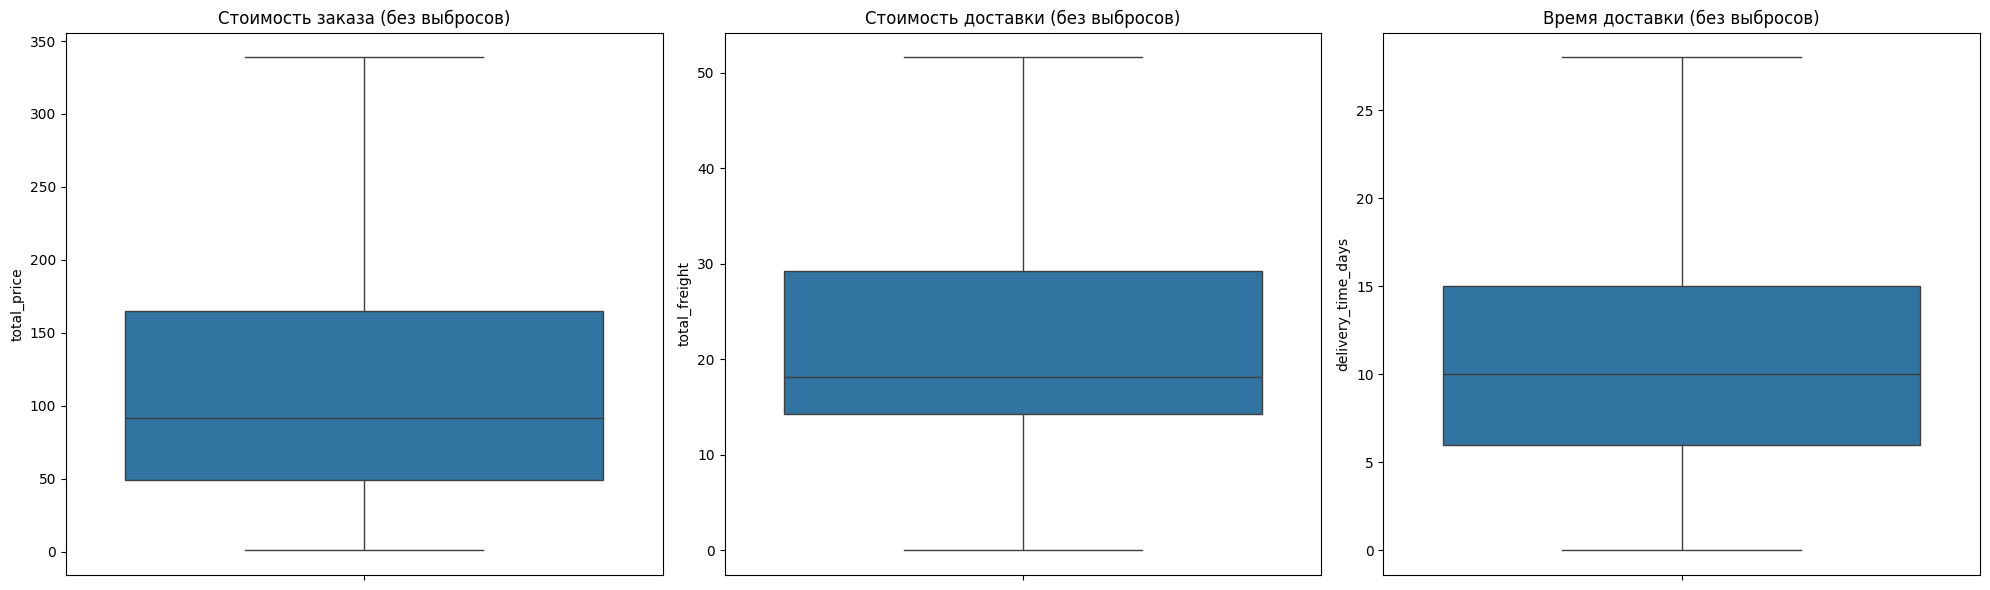

In [410]:
plt.figure(figsize=(20, 6))

# 1. BoxPlot Стоимость заказа без выбросов 
plt.subplot(1, 3, 1)
sns.boxplot(y=data['total_price'], showfliers=False)
plt.title('Стоимость заказа (без выбросов)')

# 2. BoxPlot Стоимость доставки без выбросов
plt.subplot(1, 3, 2)
sns.boxplot(y=data['total_freight'], showfliers=False)
plt.title('Стоимость доставки (без выбросов)')

# 3. BoxPlot Время доставки без выбросов
plt.subplot(1, 3, 3)
sns.boxplot(y=data['delivery_time_days'], showfliers=False)
plt.title('Время доставки (без выбросов)')

plt.tight_layout()
plt.show()


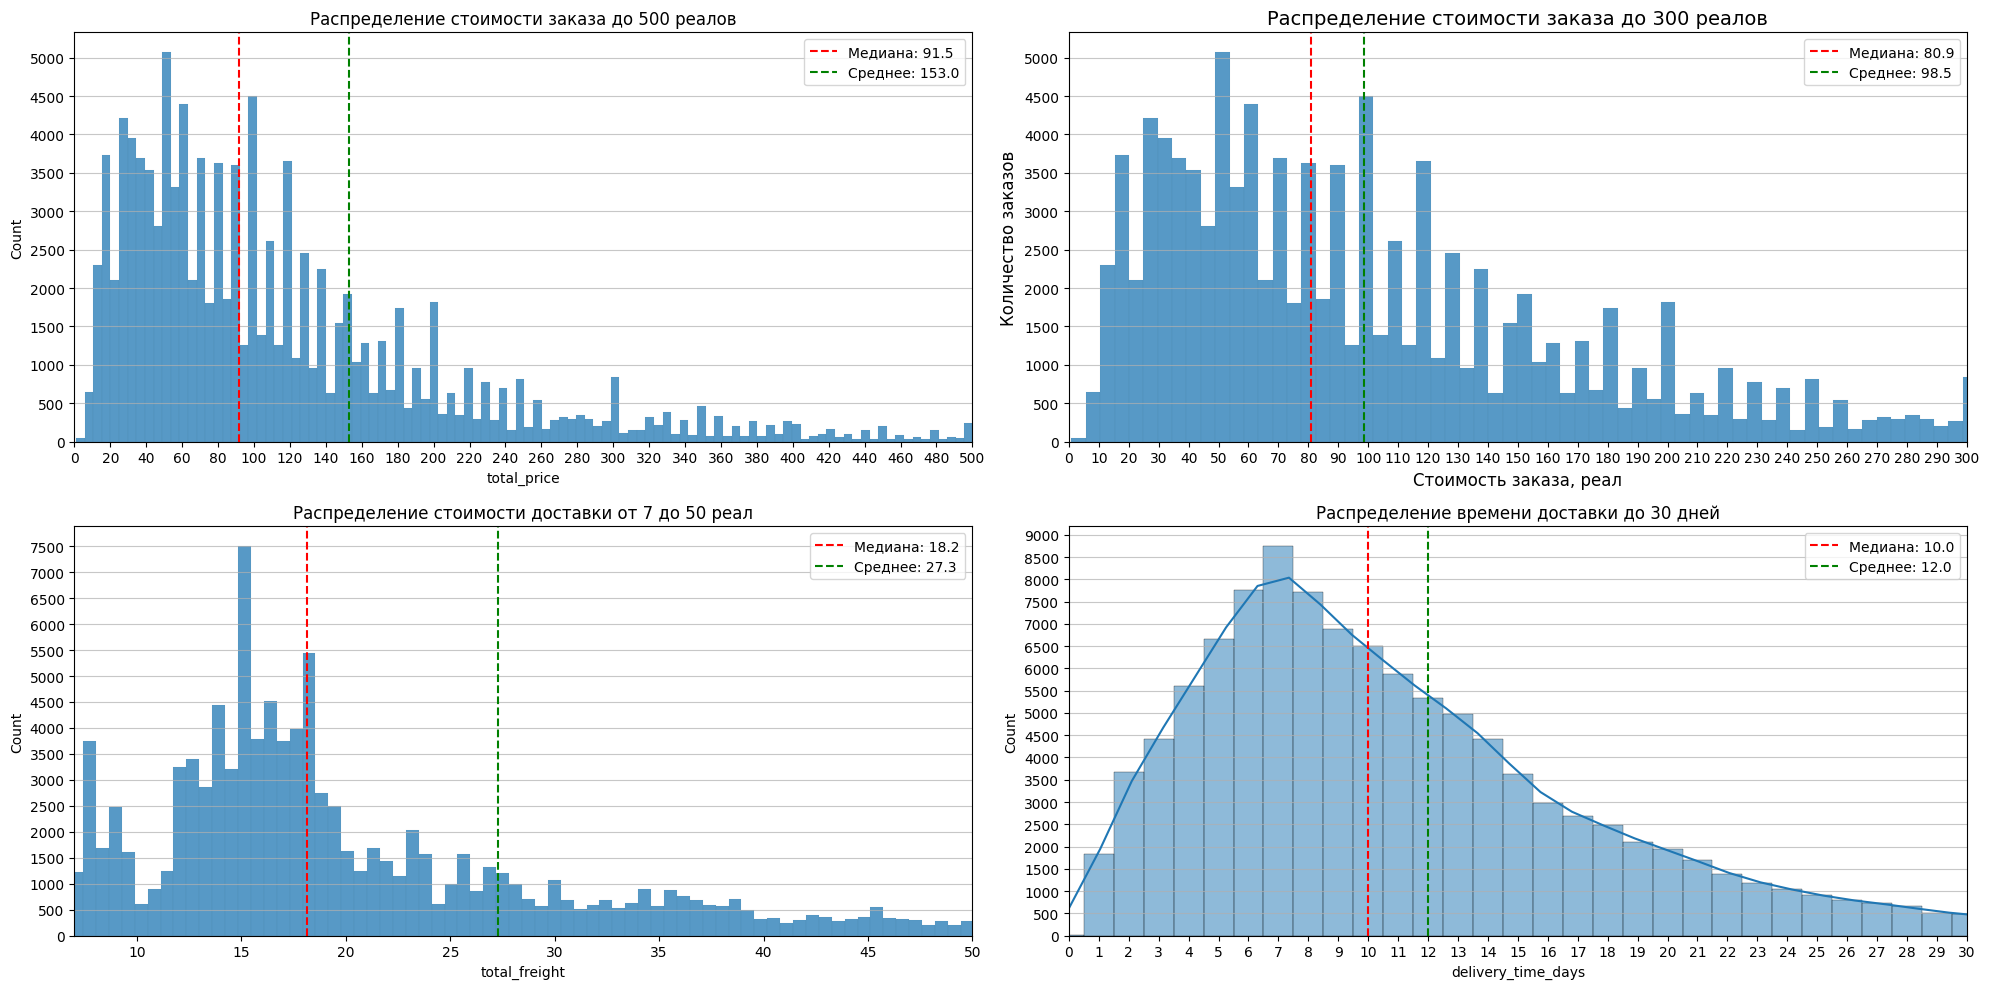

In [411]:
plt.figure(figsize=(20, 10))

# 1. Стоимость заказа
plt.subplot(2, 2, 1)
sns.histplot(data['total_price'])  
plt.xlim(0, 500) 
plt.xticks(np.arange(0, 501, 20)) 
plt.title('Распределение стоимости заказа до 500 реалов')
plt.grid(axis='y', linestyle='-', alpha=0.7) 
plt.yticks(range(0, 5500, 500), fontsize=10)

# Медиана и Среднее
median_price = data['total_price'].median()
mean_price = data['total_price'].mean()

plt.axvline(median_price, color='red', linestyle='--', label=f'Медиана: {median_price:.1f}')
plt.axvline(mean_price, color='green', linestyle='--', label=f'Среднее: {mean_price:.1f}')
plt.legend()


# 2. Приближённая стоимость заказа (до 300 реалов)
plt.subplot(2, 2, 2)
sns.histplot(data['total_price'])

plt.xlim(1, 300)  
plt.xticks(range(0, 301, 10))
plt.yticks(range(0, 5500, 500), fontsize=10)

plt.title('Распределение стоимости заказа до 300 реалов', fontsize=14)
plt.xlabel('Стоимость заказа, реал', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)

# Медиана и Среднее
median_price_300 = data[data['total_price'] <= 300]['total_price'].median()
mean_price_300 = data[data['total_price'] <= 300]['total_price'].mean()

plt.axvline(median_price_300, color='red', linestyle='--', label=f'Медиана: {median_price_300:.1f}')
plt.axvline(mean_price_300, color='green', linestyle='--', label=f'Среднее: {mean_price_300:.1f}')
plt.legend()

plt.grid(axis='y', linestyle='-', alpha=0.7) 

# 3. Стоимость доставки
plt.subplot(2, 2, 3)
sns.histplot(data['total_freight'])
plt.xlim(7, 50)
plt.title('Распределение стоимости доставки от 7 до 50 реал')
plt.yticks(np.arange(0, 8000, 500), fontsize=10)
plt.grid(axis='y', linestyle='-', alpha=0.7)

median_freight = data['total_freight'].median()
mean_freight = data['total_freight'].mean()

plt.axvline(median_freight, color='red', linestyle='--', label=f'Медиана: {median_freight:.1f}')
plt.axvline(mean_freight, color='green', linestyle='--', label=f'Среднее: {mean_freight:.1f}')
plt.legend()

# 4. Время доставки
plt.subplot(2, 2, 4)
sns.histplot(data['delivery_time_days'], discrete=True, binwidth=1, kde=True)  # KDE - голубая линия

plt.xlim(0.5, 30) 
plt.xticks(np.arange(0, 31, 1)) 
plt.yticks(np.arange(0, 9500, 500), fontsize=10)

plt.title('Распределение времени доставки до 30 дней')
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Медиана и Среднее
median_days = data['delivery_time_days'].median()
mean_days = data['delivery_time_days'].mean()

plt.axvline(median_days, color='red', linestyle='--', label=f'Медиана: {median_days:.1f}')
plt.axvline(mean_days, color='green', linestyle='--', label=f'Среднее: {mean_days:.1f}')
plt.legend()

plt.tight_layout()
plt.show()



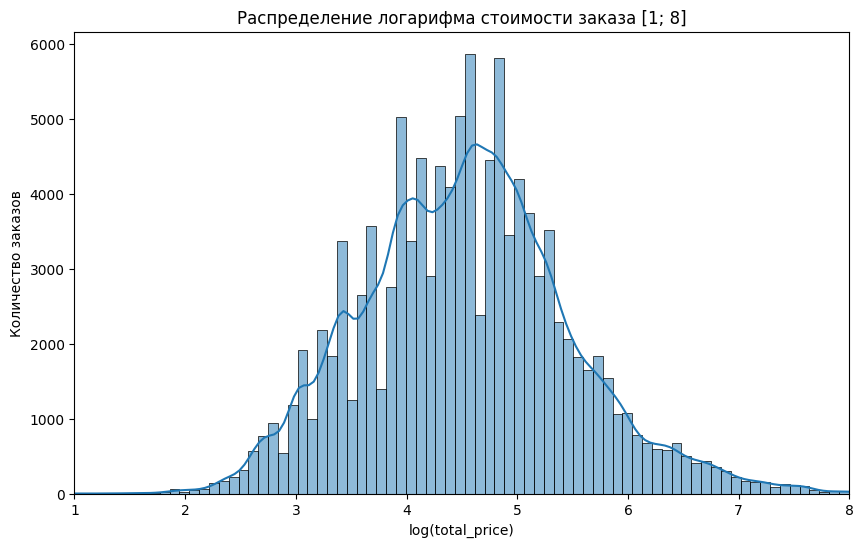

In [412]:
plt.figure(figsize=(10, 6))

log_total_price = np.log1p(data['total_price'])

sns.histplot(log_total_price, kde=True, bins=100)
plt.title('Распределение логарифма стоимости заказа [1; 8]')
plt.xlim(1,8)
plt.xlabel('log(total_price)')
plt.ylabel('Количество заказов')

plt.show()

In [413]:
def print_order_status_counts_translated(df):

    # Словарь переводов
    status_translation = {
        'delivered': 'Доставлено',
        'shipped': 'Отправлено',
        'canceled': 'Отменено',
        'invoiced': 'Выставлен счёт',
        'processing': 'В обработке',
        'unavailable': 'Недоступно',
        'approved': 'Одобрено',
        'created': 'Создано',
        'in_transit': 'В пути'
    }

    status_counts = df['order_status'].value_counts()

    print("Статусы заказов:\n")
    for status, count in status_counts.items():
        translated_status = status_translation.get(status, status.capitalize())
        print(f"- {translated_status}: {count} заказов")

print_order_status_counts_translated(orders)  

Статусы заказов:

- Доставлено: 96478 заказов
- Отправлено: 1107 заказов
- Отменено: 625 заказов
- Недоступно: 609 заказов
- Выставлен счёт: 314 заказов
- В обработке: 301 заказов
- Создано: 5 заказов
- Одобрено: 2 заказов


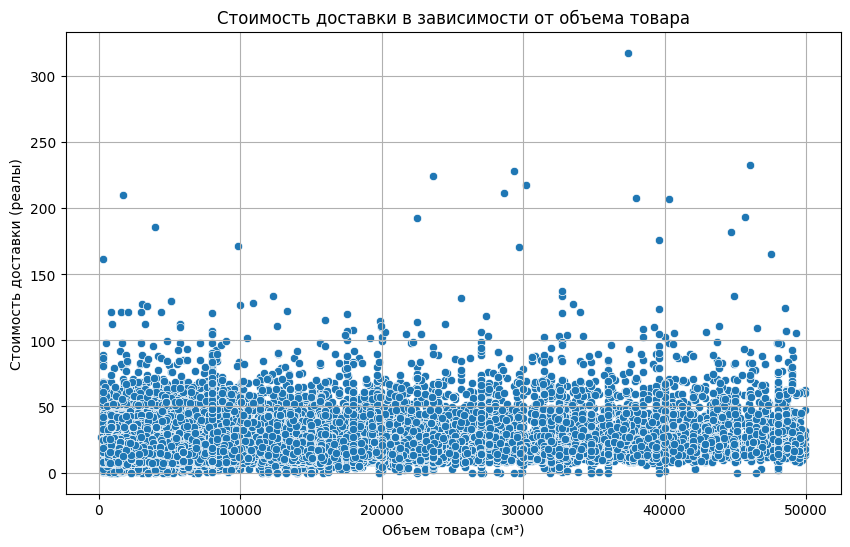


Общий тренд | Стоимость доставки слабо зависит от объема товара
Выбросы     | Иногда доставка дорогая для товаров любого объема
Логистика   | Скорее всего, в доставке важнее другие факторы (регион, продавец, тип продукта), а не только объем


In [414]:
order_items = pd.read_csv(r'I:\PET\ANALITICS\Brazilian_Ecommerce_Analysis\olist_order_items_dataset.csv')
products = pd.read_csv(r'I:\PET\ANALITICS\Brazilian_Ecommerce_Analysis\olist_products_dataset.csv')

# Объединяем по product_id
order_items_merged = order_items.merge(products, on='product_id', how='left')

# Считаем объем товара (в см³)
order_items_merged['product_volume_cm3'] = (
    order_items_merged['product_length_cm'] *
    order_items_merged['product_height_cm'] *
    order_items_merged['product_width_cm']
)

# Убираем строки с отсутствующими объемами или доставкой
order_items_merged = order_items_merged.dropna(subset=['product_volume_cm3', 'freight_value'])

# Фильтрация выбросов
order_items_filtered = order_items_merged[order_items_merged['product_volume_cm3'] < 50000]

# Строим scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='product_volume_cm3', y='freight_value', data=order_items_filtered)
plt.title('Стоимость доставки в зависимости от объема товара')
plt.xlabel('Объем товара (см³)')
plt.ylabel('Стоимость доставки (реалы)')
plt.grid()
plt.show()

print("""
Общий тренд | Стоимость доставки слабо зависит от объема товара
Выбросы     | Иногда доставка дорогая для товаров любого объема
Логистика   | Скорее всего, в доставке важнее другие факторы (регион, продавец, тип продукта), а не только объем""")

In [415]:
# Создаем группы по объему
bins = [0, 5000, 10000, 20000, 50000]
labels = ['Очень маленький', 'Маленький', 'Средний', 'Большой']
order_items_filtered.loc[:, 'volume_group'] = pd.cut(order_items_filtered['product_volume_cm3'], bins=bins, labels=labels)

# Группируем и считаем среднюю стоимость доставки
volume_group_means = order_items_filtered.groupby('volume_group', observed=False)['freight_value'].mean().reset_index()

# Переименовываем столбцы
volume_group_means.columns = ['Группа объема', 'Средняя стоимость доставки (реал)']

# Красиво выводим
print(volume_group_means)


     Группа объема  Средняя стоимость доставки (реал)
0  Очень маленький                          15.722113
1        Маленький                          18.531958
2          Средний                          19.209135
3          Большой                          22.890739


C:\Users\anast\AppData\Local\Temp\ipykernel_31772\2846786552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_items_filtered.loc[:, 'volume_group'] = pd.cut(order_items_filtered['product_volume_cm3'], bins=bins, labels=labels)


In [416]:
translation_df = pd.read_csv('I:/PET/ANALITICS/Brazilian_Ecommerce_Analysis/product_category_name_translation.csv')
category_translation = dict(zip(translation_df['product_category_name'], translation_df['product_category_name_english']))

category_translation = {
    'beleza_saude': 'Красота и здоровье',
    'esporte_lazer': 'Спорт и отдых',
    'cama_mesa_banho': 'Товары для спальни и ванной',
    'moveis_decoracao': 'Мебель и декор',
    'informatica_acessorios': 'Компьютеры и аксессуары',
    'automotivo': 'Автотовары',
    'brinquedos': 'Игрушки',
    'relogios_presentes': 'Часы и подарки',
    'telefonia': 'Телефония',
    'utilidades_domesticas': 'Товары для дома',
    'perfumaria': 'Парфюмерия',
    'bebes': 'Товары для малышей',
    'eletronicos': 'Электроника',
    'ferramentas_jardim': 'Инструменты и сад',
    'pet_shop': 'Товары для животных',
    'livros_tecnicos': 'Техническая литература',
    'fashion_bolsas_e_acessorios': 'Сумки и аксессуары',
    'eletroportateis': 'Мелкая бытовая техника',
    'construcao_ferramentas_construcao': 'Строительные инструменты',
    'fashion_calcados': 'Обувь',
    'casa_conforto': 'Товары для уюта дома',
    'malas_acessorios': 'Багаж и аксессуары',
    'telefonia_fixa': 'Стационарные телефоны',
    'moveis_cozinha_area_de_servico_jantar_e_jardim': 'Мебель для кухни и сада',
    'agro_industria_e_comercio': 'Сельское хозяйство и торговля',
    'industria_comercio_e_negocios': 'Промышленность и бизнес',
    'cool_stuff': 'Прикольные штуки',
    'fashion_underwear_e_moda_praia': 'Нижнее белье и пляжная одежда',
    'moveis_sala': 'Мебель для гостиной',
    'livros_importados': 'Импортные книги',
    'instrumentos_musicais': 'Музыкальные инструменты',
    'fashion_roupa_masculina': 'Мужская одежда',
    'bebidas': 'Напитки',
    'eletrodomesticos_2': 'Бытовая техника (дополнительно)',
    'artigos_de_festas': 'Товары для праздников',
    'casa_construcao': 'Дом и строительство',
    'livros_interesse_geral': 'Книги общего интереса',
    'artes': 'Искусство',
    'audio': 'Аудиотехника',
    'tablets_impressao_imagem': 'Планшеты, печать и изображения',
    'fashion_roupa_feminina': 'Женская одежда',
    'cine_foto': 'Кино и фото',
    'pcs': 'Компьютеры',
    'flores': 'Цветы',
    'climatizacao': 'Климатическая техника',
    'market_place': 'Маркетплейс',
    'portateis_casa_forno_e_cafe': 'Маленькая кухонная техника',
    'seguros_e_servicos': 'Страхование и услуги',
    'moveis_escritorio': 'Офисная мебель',
    'fashion_esporte': 'Одежда для спорта',
    'alimentos_bebidas': 'Еда и напитки',
    'construcao_ferramentas_seguranca': 'Инструменты и безопасность',
    'fashion_roupa_infanto_juvenil': 'Одежда для детей и подростков',
    'construcao_ferramentas_ferramentas': 'Ручные инструменты',
    'alimentos': 'Еда',
    'construcao_ferramentas_iluminacao': 'Освещение',
    'la_cuisine': 'Кухня (La Cuisine)',
    'artes_e_artesanato': 'Искусство и ремесло',
    'moveis_quarto': 'Мебель для спальни',
    'consoles_games': 'Игровые консоли и игры',
    'fashion_roupa_moletom': 'Одежда из флиса'
}

city_translation = {
    'sao paulo': 'Сан-Паулу',
    'rio de janeiro': 'Рио-де-Жанейро',
    'belo horizonte': 'Белу-Оризонти',
    'curitiba': 'Куритиба',
    'campinas': 'Кампинас',
    'porto alegre': 'Порту-Алегри',
    'salvador': 'Сальвадор',
    'fortaleza': 'Форталеза',
    'brasilia': 'Бразилиа',
    'guarulhos': 'Гуарульюс',
    'sao bernardo do campo': 'Сан-Бернарду-ду-Кампу',
    'osasco': 'Оса́ску',
    'santo andre': 'Санту-Андре',
    'sao jose dos campos': 'Сан-Жозе-дус-Кампус',
    'sao goncalo': 'Сан-Гонсалу',
    'duque de caxias': 'Дуки-ди-Кашиас',
    'sao luis': 'Сан-Луис',
    'maua': 'Мауá',
    'niteroi': 'Нитерой',
    'santos': 'Сантус',
    'cuiaba': 'Куяба',
    'joinville': 'Жоинвили',
    'sao jose do rio preto': 'Сан-Жозе-ду-Риу-Прету',
    'teresina': 'Терезина',
    'campo grande': 'Кампу-Гранди',
    'sorocaba': 'Сорокаба',
    'ribeirao preto': 'Рибейран-Прету',
    'feira de santana': 'Фейра-ди-Сантана',
    'londrina': 'Лондрина',
    'novos campos': 'Ново-Кампус',
    'maringa': 'Маринга',
    'manaus': 'Манаус',
    'recife': 'Ресифи',
    'goiania': 'Гояния',
    'vitoria': 'Витория',
    'caxias do sul': 'Кашиас-ду-Сул',
    'petropolis': 'Петрополис',
    'itabuna': 'Итабуна',
    'joao pessoa': 'Жуан-Песоа',
    'blumenau': 'Блуменау',
    'florianopolis': 'Флорианополис',
    'maceio': 'Масейо',
    'carapicuiba': 'Карапикуиба',
    'piracicaba': 'Пирасикаба',
    'juiz de fora': 'Жуис-ди-Фора',
    'sao vicente': 'Сан-Висенти',
    'anapolis': 'Анаполис',
    'vila velha': 'Вила-Велья',
    'sao caetano do sul': 'Сан-Каетану-ду-Сул',
    'betim': 'Бетим'
}
state_translation = {
    'SP': 'Сан-Паулу',
    'RJ': 'Рио-де-Жанейро',
    'MG': 'Минас-Жерайс',
    'RS': 'Риу-Гранди-ду-Сул',
    'PR': 'Парана',
    'BA': 'Баия',
    'SC': 'Санта-Катарина',
    'GO': 'Гояс',
    'PE': 'Пернамбуку',
    'ES': 'Эспириту-Санту',
    'DF': 'Федеральный округ',
    'CE': 'Сеара',
    'PA': 'Пара',
    'MT': 'Мату-Гросу',
    'MA': 'Мараньян',
    'MS': 'Мату-Гросу-ду-Сул',
    'PB': 'Параиба',
    'RN': 'Риу-Гранди-ду-Норте',
    'AL': 'Алагоас',
    'PI': 'Пиауи',
    'SE': 'Сержипи',
    'AM': 'Амазонас',
    'TO': 'Токантинс',
    'RO': 'Рондония',
    'AC': 'Акри',
    'AP': 'Амапа',
    'RR': 'Рорайма'
}
data.loc[:, 'product_category_name'] = data['product_category_name'].map(category_translation).fillna('Другое')
data.loc[:, 'customer_state'] = data['customer_state'].map(state_translation).fillna('Другой регион')
data.loc[:,'customer_city'] = data['customer_city'].map(city_translation).fillna(data['customer_city'])


In [417]:
# Категории товаров
pd.set_option('display.max_rows', None)
category_stats = data.groupby('product_category_name').agg({
    'total_price': 'mean'
})
category_stats_sorted = category_stats['total_price'].sort_values(ascending=False)

# Города
city_stats = data.groupby('customer_city').agg({
    'delivery_time_days': 'mean'
})
city_stats_sorted = city_stats['delivery_time_days'].sort_values(ascending=False)

# Штаты
state_stats = data.groupby('customer_state').agg({
    'total_freight': 'mean'
})
state_stats_sorted = state_stats['total_freight'].sort_values(ascending=False)


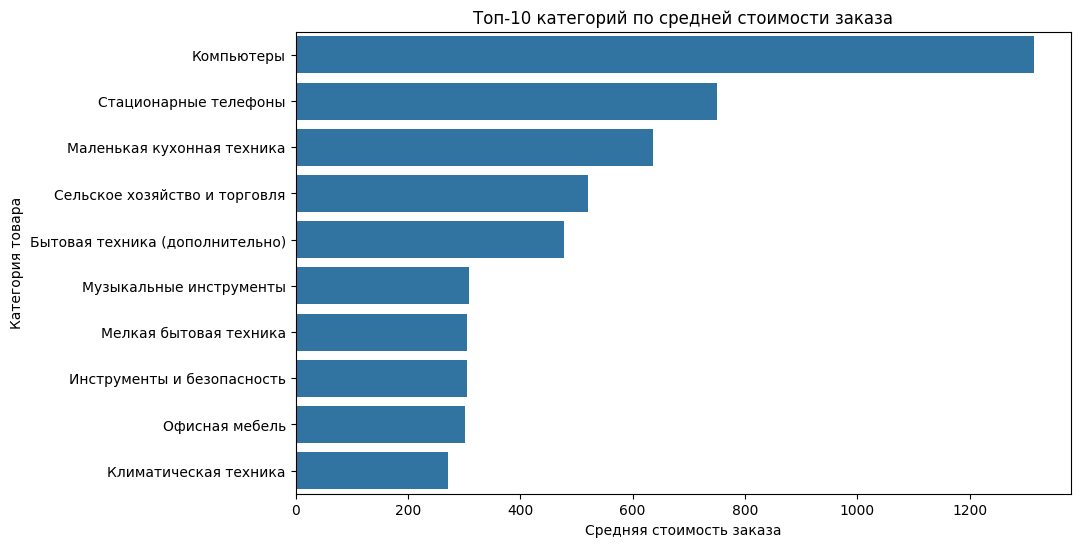

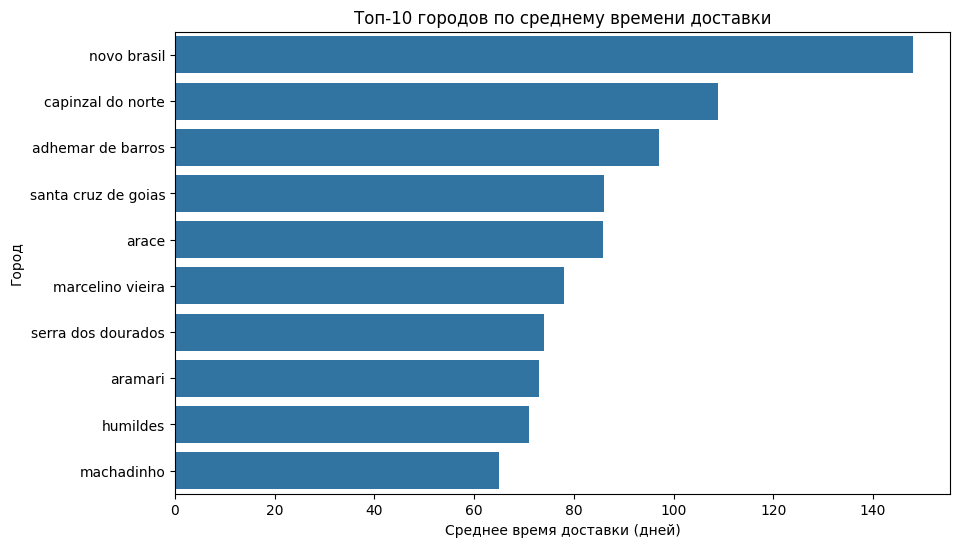

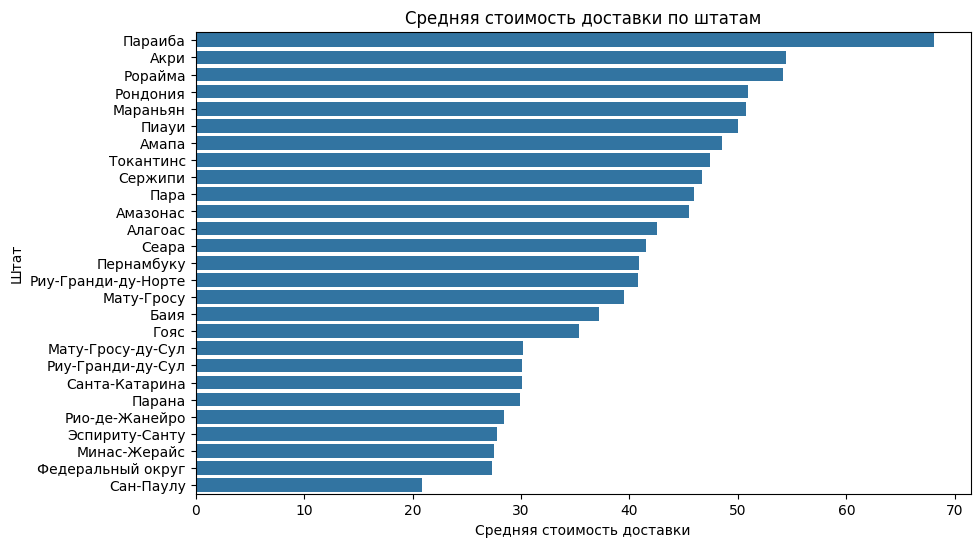

In [418]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'DejaVu Sans'

# Топ-10 категорий товаров по средней цене
plt.figure(figsize=(10,6))
sns.barplot(x=category_stats_sorted.head(10), y=category_stats_sorted.head(10).index)
plt.title('Топ-10 категорий по средней стоимости заказа')
plt.xlabel('Средняя стоимость заказа')
plt.ylabel('Категория товара')
plt.show()

# Топ-10 городов по среднему времени доставки
plt.figure(figsize=(10,6))
sns.barplot(x=city_stats_sorted.head(10), y=city_stats_sorted.head(10).index)
plt.title('Топ-10 городов по среднему времени доставки')
plt.xlabel('Среднее время доставки (дней)')
plt.ylabel('Город')
plt.show()

# Все штаты по средней стоимости доставки
plt.figure(figsize=(10,6))
sns.barplot(x=state_stats_sorted, y=state_stats_sorted.index)
plt.title('Средняя стоимость доставки по штатам')
plt.xlabel('Средняя стоимость доставки')
plt.ylabel('Штат')
plt.show()


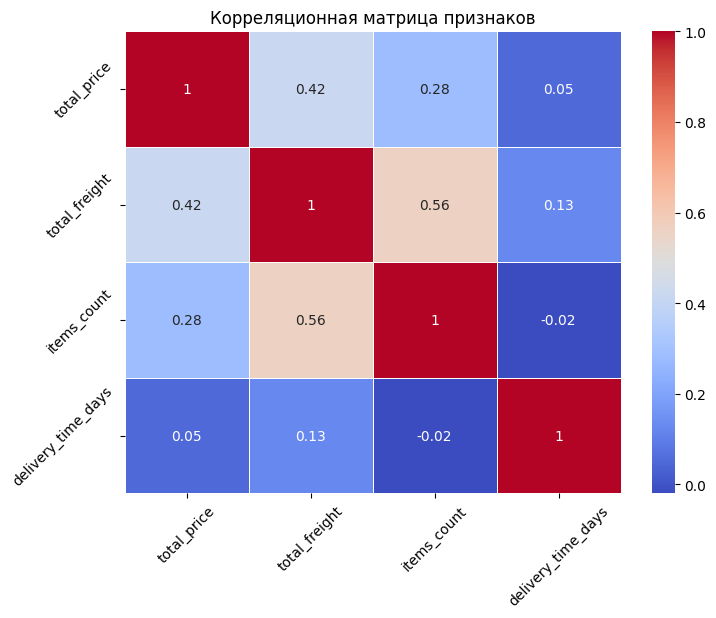

In [419]:
# Построение матрицы корреляций

columns_to_corr = ['total_price', 'total_freight', 'items_count', 'delivery_time_days']
correlation_matrix = data[columns_to_corr].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


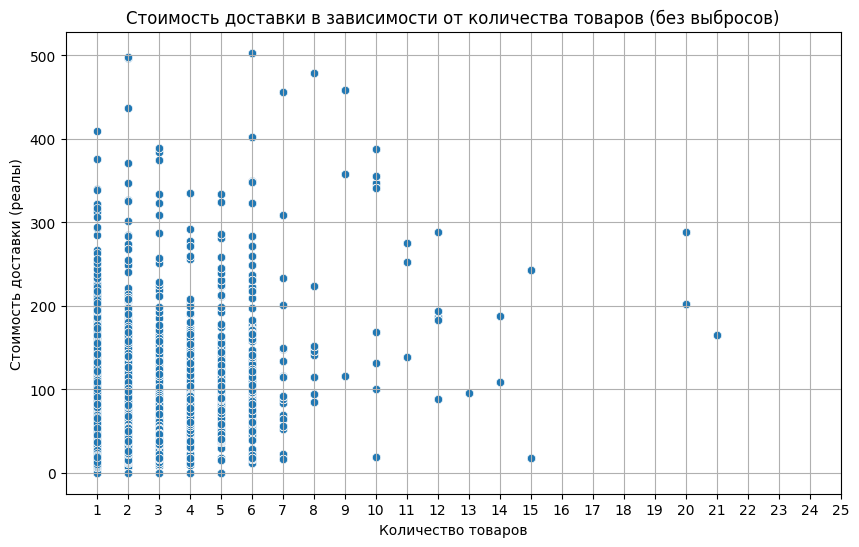

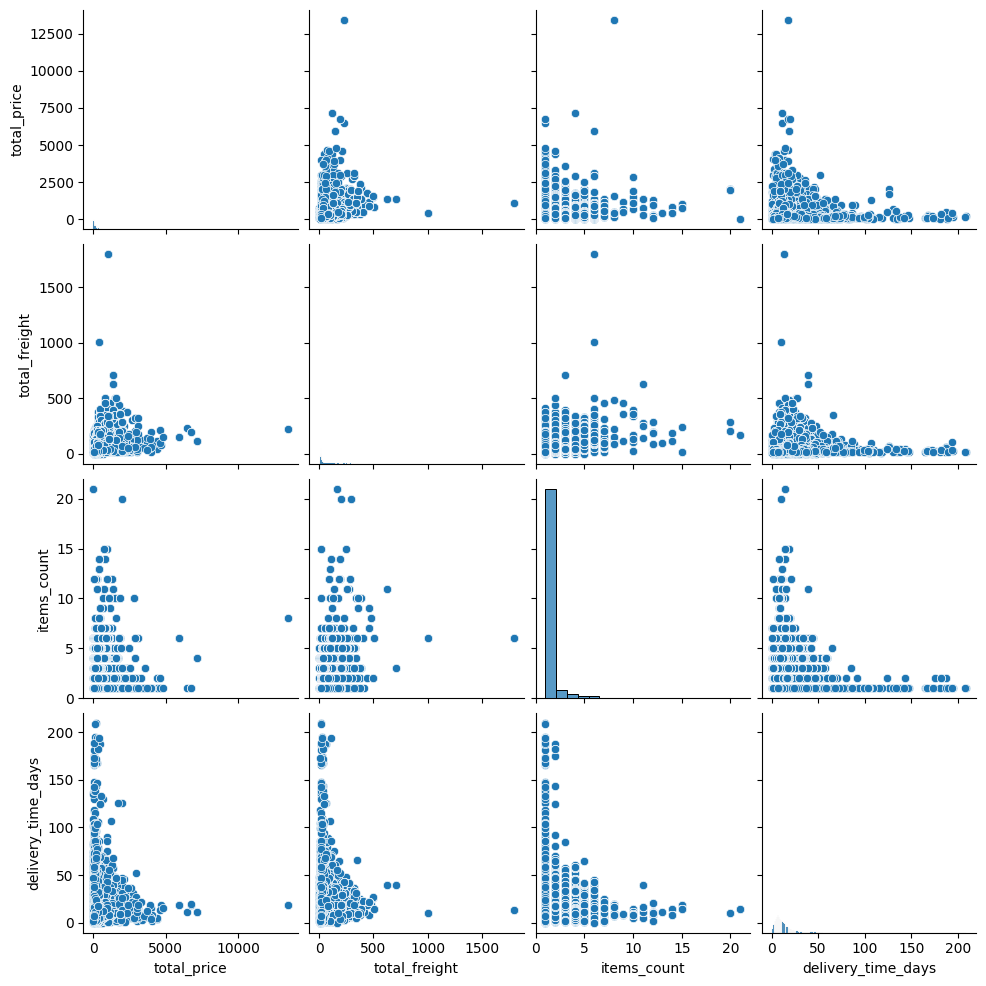

In [420]:
filtered_data = data[(data['total_freight'] <= 600) & (data['items_count'] <= 25)]

plt.figure(figsize=(10,6))
sns.scatterplot(x='items_count', y='total_freight', data=filtered_data)

plt.title('Стоимость доставки в зависимости от количества товаров (без выбросов)')
plt.xlabel('Количество товаров')
plt.ylabel('Стоимость доставки (реалы)')

plt.xticks(ticks=range(1, 26, 1))

plt.grid()

sns.pairplot(data[['total_price', 'total_freight', 'items_count', 'delivery_time_days']])

plt.show()


In [421]:
# Средняя стоимость доставки для каждого количества товаров
mean_freight_per_items = filtered_data.groupby('items_count')['total_freight'].mean()

# Количество заказов для каждого количества товаров
order_counts = filtered_data['items_count'].value_counts().sort_index()

# Оставляем только товары от 1 до 21
mean_freight_per_items = mean_freight_per_items.loc[(mean_freight_per_items.index >= 1) & (mean_freight_per_items.index <= 21)]
order_counts = order_counts.loc[(order_counts.index >= 1) & (order_counts.index <= 21)]

# Объединяем в одну таблицу
summary_table = pd.DataFrame({
    'Количество товаров': mean_freight_per_items.index,
    'Средняя стоимость доставки (реалы)': mean_freight_per_items.round(2),
    'Количество заказов': order_counts
})

# Сброс индексов для красоты
summary_table.reset_index(drop=True, inplace=True)

# Выводим
print(summary_table)



    Количество товаров  Средняя стоимость доставки (реалы)  Количество заказов
0                    1                               20.37               88863
1                    2                               37.21               15032
2                    3                               54.65                3963
3                    4                               74.08                2020
4                    5                               89.86                1020
5                    6                              103.73                1176
6                    7                              123.72                 154
7                    8                              179.56                  64
8                    9                              310.74                  27
9                   10                              231.14                  80
10                  11                              222.14                  33
11                  12                              

In [422]:
"""
plt.figure(figsize=(10,6))
mean_freight_per_items.plot(kind='line', marker='o')
plt.title('Средняя стоимость доставки в зависимости от количества товаров')
plt.xlabel('Количество товаров')
plt.ylabel('Средняя стоимость доставки (реалы)')
plt.xticks(range(1, 26, 1))
plt.grid()
plt.show()
"""

"\nplt.figure(figsize=(10,6))\nmean_freight_per_items.plot(kind='line', marker='o')\nplt.title('Средняя стоимость доставки в зависимости от количества товаров')\nplt.xlabel('Количество товаров')\nplt.ylabel('Средняя стоимость доставки (реалы)')\nplt.xticks(range(1, 26, 1))\nplt.grid()\nplt.show()\n"

In [423]:
""" from sklearn.linear_model import LinearRegression
import numpy as np

# Подготовка данных
X = filtered_data[['items_count']]
y = filtered_data['total_freight']

# Обучение модели
model = LinearRegression()
model.fit(X, y)

# Коэффициенты
print(f"Коэффициент наклона: {model.coef_[0]:.3f}")
print(f"Свободный член (intercept): {model.intercept_:.3f}")

# Прогнозируем стоимость доставки для 1–10 товаров без предупреждений
for i in range(1, 21):
    pred = model.predict(pd.DataFrame({'items_count': [i]}))
    print(f"Прогнозируемая стоимость доставки для {i} товаров: {pred[0]:.2f} реалов")


# Группируем по количеству товаров и считаем среднюю стоимость доставки
mean_freight_per_items = filtered_data.groupby('items_count')['total_freight'].mean()

# Выведем только для товаров от 1 до 21
mean_freight_per_items = mean_freight_per_items.loc[mean_freight_per_items.index <= 21]

# Печатаем красиво
for items_count, mean_cost in mean_freight_per_items.items():
    print(f"Средняя стоимость доставки для {items_count} товаров: {mean_cost:.2f} реалов")
"""

' from sklearn.linear_model import LinearRegression\nimport numpy as np\n\n# Подготовка данных\nX = filtered_data[[\'items_count\']]\ny = filtered_data[\'total_freight\']\n\n# Обучение модели\nmodel = LinearRegression()\nmodel.fit(X, y)\n\n# Коэффициенты\nprint(f"Коэффициент наклона: {model.coef_[0]:.3f}")\nprint(f"Свободный член (intercept): {model.intercept_:.3f}")\n\n# Прогнозируем стоимость доставки для 1–10 товаров без предупреждений\nfor i in range(1, 21):\n    pred = model.predict(pd.DataFrame({\'items_count\': [i]}))\n    print(f"Прогнозируемая стоимость доставки для {i} товаров: {pred[0]:.2f} реалов")\n\n\n# Группируем по количеству товаров и считаем среднюю стоимость доставки\nmean_freight_per_items = filtered_data.groupby(\'items_count\')[\'total_freight\'].mean()\n\n# Выведем только для товаров от 1 до 21\nmean_freight_per_items = mean_freight_per_items.loc[mean_freight_per_items.index <= 21]\n\n# Печатаем красиво\nfor items_count, mean_cost in mean_freight_per_items.items(

Товары   Средняя доставка          Прогноз модели      
-------------------------------------------------------
1        20.37 реалов           20.81 реалов
2        37.21 реалов           36.67 реалов
3        54.65 реалов           52.54 реалов
4        74.08 реалов           68.40 реалов
5        89.86 реалов           84.26 реалов
6        103.73 реалов           100.13 реалов
7        123.72 реалов           115.99 реалов
8        179.56 реалов           131.86 реалов
9        310.74 реалов           147.72 реалов
10       231.14 реалов           163.58 реалов
11       222.14 реалов           179.45 реалов
12       187.83 реалов           195.31 реалов
13       96.07 реалов           211.17 реалов
14       148.47 реалов           227.04 реалов
15       130.65 реалов           242.90 реалов
20       245.60 реалов           322.22 реалов
21       164.37 реалов           338.08 реалов


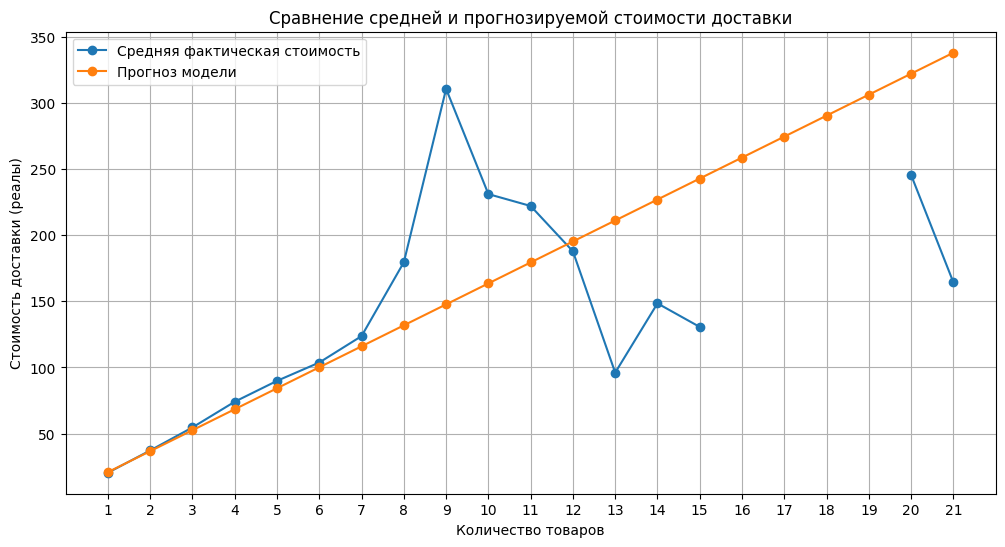

In [424]:
from sklearn.linear_model import LinearRegression

X = filtered_data[['items_count']]
y = filtered_data['total_freight']

model = LinearRegression()
model.fit(X, y)

# 1. Группируем: Средняя фактическая стоимость доставки по количеству товаров
mean_freight_per_items = filtered_data.groupby('items_count')['total_freight'].mean()
mean_freight_per_items = mean_freight_per_items.loc[mean_freight_per_items.index <= 21]

# 2. Прогнозируем стоимость доставки через обученную модель
predicted_freight = {}

for i in range(1, 22):  # от 1 до 21
    prediction = model.predict(pd.DataFrame({'items_count': [i]}))
    predicted_freight[i] = prediction[0]

print(f"{'Товары':<8} {'Средняя доставка':<25} {'Прогноз модели':<20}")
print('-'*55)
for i in range(1, 22):
    mean_value = mean_freight_per_items.get(i, None)
    predicted_value = predicted_freight.get(i, None)
    if mean_value is not None and predicted_value is not None:
        print(f"{i:<8} {mean_value:.2f} реалов{'':<10} {predicted_value:.2f} реалов")

items_counts = list(range(1, 22))
mean_values = [mean_freight_per_items.get(i, None) for i in items_counts]
predicted_values = [predicted_freight.get(i, None) for i in items_counts]

plt.figure(figsize=(12,6))
plt.plot(items_counts, mean_values, marker='o', label='Средняя фактическая стоимость')
plt.plot(items_counts, predicted_values, marker='o', linestyle='-', label='Прогноз модели')
plt.title('Сравнение средней и прогнозируемой стоимости доставки')
plt.xlabel('Количество товаров')
plt.ylabel('Стоимость доставки (реалы)')
plt.xticks(range(1, 22))
plt.legend()
plt.grid()
plt.show()


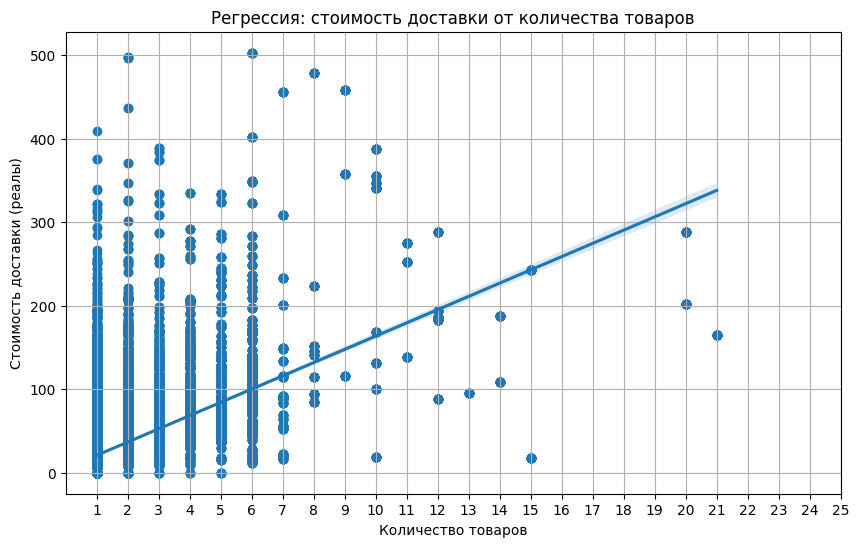

In [425]:
plt.figure(figsize=(10,6))
sns.regplot(x='items_count', y='total_freight', data=filtered_data, scatter_kws={'alpha':1})
plt.title('Регрессия: стоимость доставки от количества товаров')
plt.xlabel('Количество товаров')
plt.ylabel('Стоимость доставки (реалы)')
plt.xticks(range(1, 26, 1))
plt.grid()
plt.show()

In [426]:
summary_table = pd.DataFrame({
    'Диапазон товаров': [
        '1–7 товаров',
        '8–11 товаров',
        '12–14 товаров',
        '15–19 товаров',
        '20–21 товаров'
    ],
    'Наблюдение': [
        'Средняя фактическая стоимость доставки близка к прогнозу линейной модели, данные стабильны.',
        'Происходит заметный скачок фактической стоимости доставки (особенно на 9 товарах).',
        'Средняя стоимость доставки нестабильна, наблюдается снижение и колебания.',
        'Почти отсутствуют заказы, данные нерепрезентативны, наблюдается "провал" на графике.',
        'Наблюдается нестабильность и значительные отклонения фактической стоимости от прогноза.'
    ],
    'Вывод': [
        'Линейная модель хорошо описывает стоимость доставки для малых заказов (до 7 товаров).',
        'Вероятно, изменение тарифов на доставку при переходе к крупным партиям товаров.',
        'Для крупных заказов возможно действует другая система скидок или логистических условий.',
        'Из-за нехватки данных нельзя надёжно моделировать стоимость доставки для этого диапазона.',
        'При очень больших заказах могут применяться индивидуальные тарифы или специальные условия логистики.'
    ]
})

summary_table



,Диапазон товаров,Наблюдение,Вывод
0,1–7 товаров,"Средняя фактическая стоимость доставки близка к прогнозу линейной модели, данные стабильны.",Линейная модель хорошо описывает стоимость доставки для малых заказов (до 7 товаров).
1,8–11 товаров,Происходит заметный скачок фактической стоимости доставки (особенно на 9 товарах).,"Вероятно, изменение тарифов на доставку при переходе к крупным партиям товаров."
2,12–14 товаров,"Средняя стоимость доставки нестабильна, наблюдается снижение и колебания.",Для крупных заказов возможно действует другая система скидок или логистических условий.
3,15–19 товаров,"Почти отсутствуют заказы, данные нерепрезентативны, наблюдается ""провал"" на графике.",Из-за нехватки данных нельзя надёжно моделировать стоимость доставки для этого диапазона.
4,20–21 товаров,Наблюдается нестабильность и значительные отклонения фактической стоимости от прогноза.,При очень больших заказах могут применяться индивидуальные тарифы или специальные условия логистики.


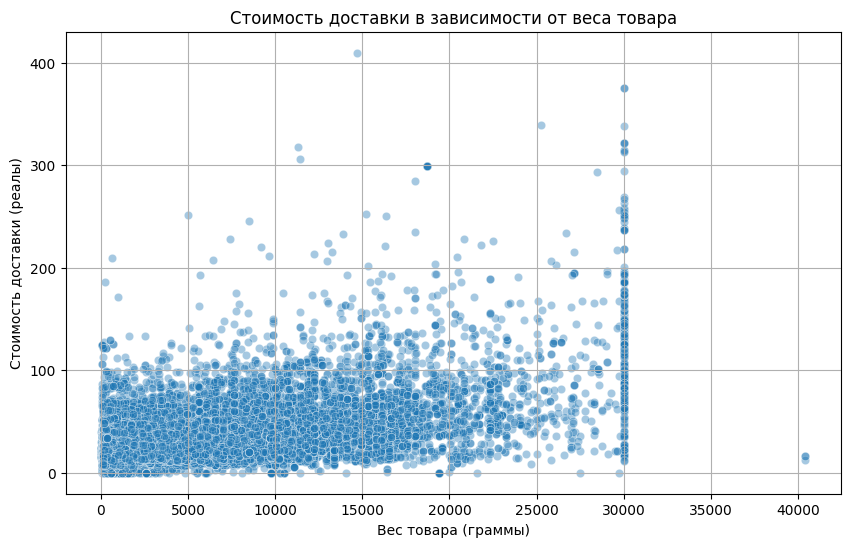

In [427]:
# 1. Фильтруем данные: удаляем строки без веса или без стоимости доставки
filtered_weight_data = order_items_merged.dropna(subset=['product_weight_g', 'freight_value'])

# 2. Строим scatterplot веса против стоимости доставки
plt.figure(figsize=(10,6))
sns.scatterplot(x='product_weight_g', y='freight_value', data=filtered_weight_data, alpha=0.4)
plt.title('Стоимость доставки в зависимости от веса товара')
plt.xlabel('Вес товара (граммы)')
plt.ylabel('Стоимость доставки (реалы)')
plt.grid()
plt.show()


Коэффициент наклона k = 0.00257
Свободный член b = 14.60610


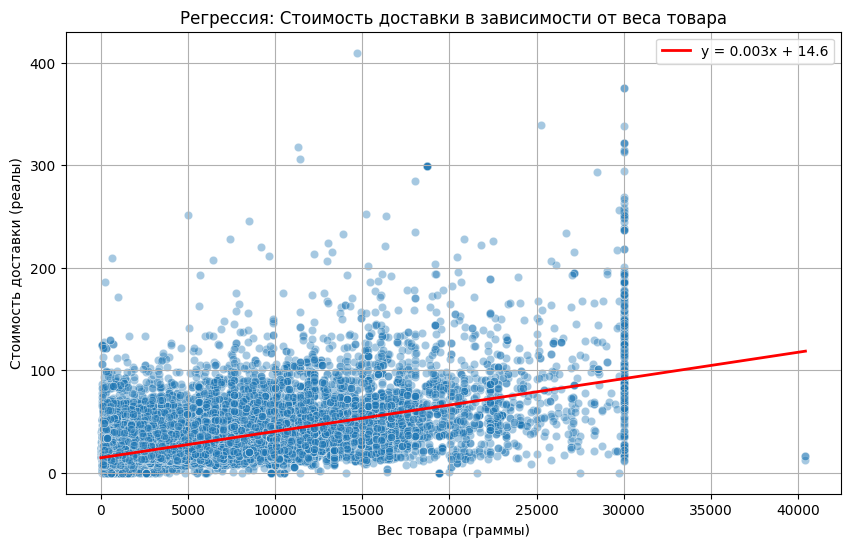

In [428]:
X = filtered_weight_data[['product_weight_g']]
y = filtered_weight_data['freight_value']

model_weight = LinearRegression()
model_weight.fit(X, y)

k = model_weight.coef_[0]
b = model_weight.intercept_

print(f"Коэффициент наклона k = {k:.5f}")
print(f"Свободный член b = {b:.5f}")

plt.figure(figsize=(10,6))
sns.scatterplot(x='product_weight_g', y='freight_value', data=filtered_weight_data, alpha=0.4)

x_range = np.linspace(filtered_weight_data['product_weight_g'].min(), filtered_weight_data['product_weight_g'].max(), 100)
y_predicted = k * x_range + b
plt.plot(x_range, y_predicted, color='red', linewidth=2, label=f'y = {k:.3f}x + {b:.1f}')

plt.title('Регрессия: Стоимость доставки в зависимости от веса товара')
plt.xlabel('Вес товара (граммы)')
plt.ylabel('Стоимость доставки (реалы)')
plt.grid()
plt.legend()
plt.show()

Вес товара в граммах оказывает очень слабое влияние на стоимость доставки в системе Olist. Логистика, вероятно, использует фиксированные тарифные сетки, а не прямую зависимость от веса. Для прогнозирования стоимости доставки вес товара не является хорошим одиночным предиктором.

In [429]:
order_items_merged_filtered = order_items_merged[order_items_merged['product_weight_g'] > 0]

# Считаем цену за грамм и за 100 грамм
order_items_merged_filtered['freight_per_gram'] = order_items_merged_filtered['freight_value'] / order_items_merged_filtered['product_weight_g']
order_items_merged_filtered['freight_per_100g'] = order_items_merged_filtered['freight_per_gram'] * 100

order_items_merged_filtered['product_category_name'] = order_items_merged_filtered['product_category_name'].map(category_translation).fillna('Другое')

# Считаем среднюю стоимость доставки за 100 грамм по каждой категории
category_price_per_100g = order_items_merged_filtered.groupby('product_category_name')['freight_per_100g'].mean().sort_values(ascending=False)

# 5. Выводим топ-10 самых дорогих и дешёвых категорий
print("Топ-10 самых дорогих категорий по цене доставки за 100 грамм:")
print(round(category_price_per_100g.head(10),2))

print("\nТоп-10 самых дешёвых категорий по цене доставки за 100 грамм:")
print(round(category_price_per_100g.tail(10),2))





Топ-10 самых дорогих категорий по цене доставки за 100 грамм:
product_category_name
Сумки и аксессуары               9.34
Телефония                        8.40
Игровые консоли и игры           7.49
Электроника                      7.49
Одежда для спорта                7.26
Одежда для детей и подростков    7.13
Стационарные телефоны            7.06
Нижнее белье и пляжная одежда    6.72
Компьютеры и аксессуары          6.18
Парфюмерия                       5.73
Name: freight_per_100g, dtype: float64

Топ-10 самых дешёвых категорий по цене доставки за 100 грамм:
product_category_name
Багаж и аксессуары                 1.86
Инструменты и сад                  1.80
Мебель для спальни                 1.57
Промышленность и бизнес            1.16
Компьютеры                         1.09
Товары для уюта дома               1.07
Бытовая техника (дополнительно)    0.93
Кухня (La Cuisine)                 0.93
Мебель для гостиной                0.58
Офисная мебель                     0.52
Name: freigh

C:\Users\anast\AppData\Local\Temp\ipykernel_31772\2558459744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_items_merged_filtered['freight_per_gram'] = order_items_merged_filtered['freight_value'] / order_items_merged_filtered['product_weight_g']
C:\Users\anast\AppData\Local\Temp\ipykernel_31772\2558459744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_items_merged_filtered['freight_per_100g'] = order_items_merged_filtered['freight_per_gram'] * 100
C:\Users\anast\AppData\Local\Temp\ipy

In [430]:
# Считаем среднюю и стандартное отклонение стоимости доставки по категориям
category_stats = order_items_merged_filtered.groupby('product_category_name')['freight_value'].agg(['mean', 'std'])

# Коэффициент вариации
category_stats['coefficient_of_variation'] = category_stats['std'] / category_stats['mean']
category_stats_sorted = category_stats.sort_values('coefficient_of_variation', ascending=False)

# Выведем топ-10 категорий с самой нестабильной стоимостью доставки
print("Топ-10 категорий с самой нестабильной стоимостью доставки (по коэффициенту вариации):")
print(category_stats_sorted.head(10))


Топ-10 категорий с самой нестабильной стоимостью доставки (по коэффициенту вариации):
                               mean        std  coefficient_of_variation
product_category_name                                                   
Музыкальные инструменты   27.409544  28.992185                  1.057740
Строительные инструменты  22.228644  22.518064                  1.013020
Промышленность и бизнес   29.420448  28.961690                  0.984407
Одежда для спорта         19.271000  18.877106                  0.979560
Товары для малышей        22.299644  20.836137                  0.934371
Мебель для кухни и сада   42.702598  39.134200                  0.916436
Красота и здоровье        18.879703  17.264329                  0.914439
Искусство                 19.354880  16.922283                  0.874316
Товары для дома           20.986374  18.269140                  0.870524
Другое                    19.234721  16.388808                  0.852043


In [431]:
import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', None)

order_items_merged_filtered_price = order_items_merged_filtered[order_items_merged_filtered['price'] > 0].copy()
order_items_merged_filtered_price['freight_share_percent'] = (order_items_merged_filtered_price['freight_value'] / order_items_merged_filtered_price['price']) * 100
order_items_merged_filtered_price['high_freight'] = order_items_merged_filtered_price['freight_share_percent'] > 50
total_orders_per_category = order_items_merged_filtered_price['product_category_name'].value_counts()
high_freight_per_category = order_items_merged_filtered_price[order_items_merged_filtered_price['high_freight']].groupby('product_category_name').size()

freight_analysis = pd.DataFrame({
    'Общее количество заказов': total_orders_per_category,
    'Количество заказов с доставкой >50%': high_freight_per_category
}).fillna(0)

freight_analysis['Процент таких заказов'] = (freight_analysis['Количество заказов с доставкой >50%'] / freight_analysis['Общее количество заказов']) * 100

freight_analysis_sorted = round(freight_analysis.sort_values('Процент таких заказов', ascending=False),2)

final_freight_analysis = freight_analysis_sorted.reset_index()[[
    'product_category_name', 
    'Количество заказов с доставкой >50%', 
    'Общее количество заказов', 
    'Процент таких заказов'
]]

final_freight_analysis.columns = [
    'Категория', 
    'Заказов с доставкой >50% стоимости', 
    'Всего заказов', 
    'Процент заказов'
]

print("ТОП-20 категорий с самой высокой долей заказов, где доставка стоит больше 50% от стоимости товара:")
print(final_freight_analysis.head(20))


ТОП-20 категорий с самой высокой долей заказов, где доставка стоит больше 50% от стоимости товара:
                  Категория  Заказов с доставкой >50% стоимости  Всего заказов  Процент заказов
0               Электроника                              1685.0           2767            60.90
1                     Цветы                                19.0             33            57.58
2                 Телефония                              2014.0           4545            44.31
3             Еда и напитки                               105.0            278            37.77
4         Одежда для спорта                                 9.0             30            30.00
5     Товары для праздников                                12.0             43            27.91
6                   Напитки                               102.0            379            26.91
7     Стационарные телефоны                                69.0            264            26.14
8    Игровые консоли и игры          